In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#visualizing existing data

df = pd.read_csv(r'C:\Users\ChunSangWoo\Sports Betting Data Scripts by State/NV Gambling Trends.csv')

df = df[['Month','SB Handle']]
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df = df.reindex(index=df.index[::-1])

df.head()

,SB Handle
Month,
2010-01-01,2.852976e+08
2010-02-01,2.211849e+08
2010-03-01,2.810555e+08
2010-04-01,1.691977e+08
2010-05-01,1.689981e+08


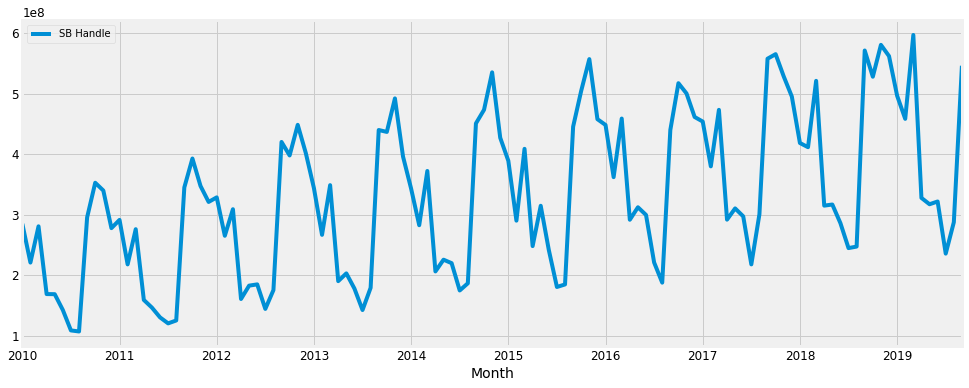

In [3]:
df.plot(figsize=(15, 6))
plt.show()

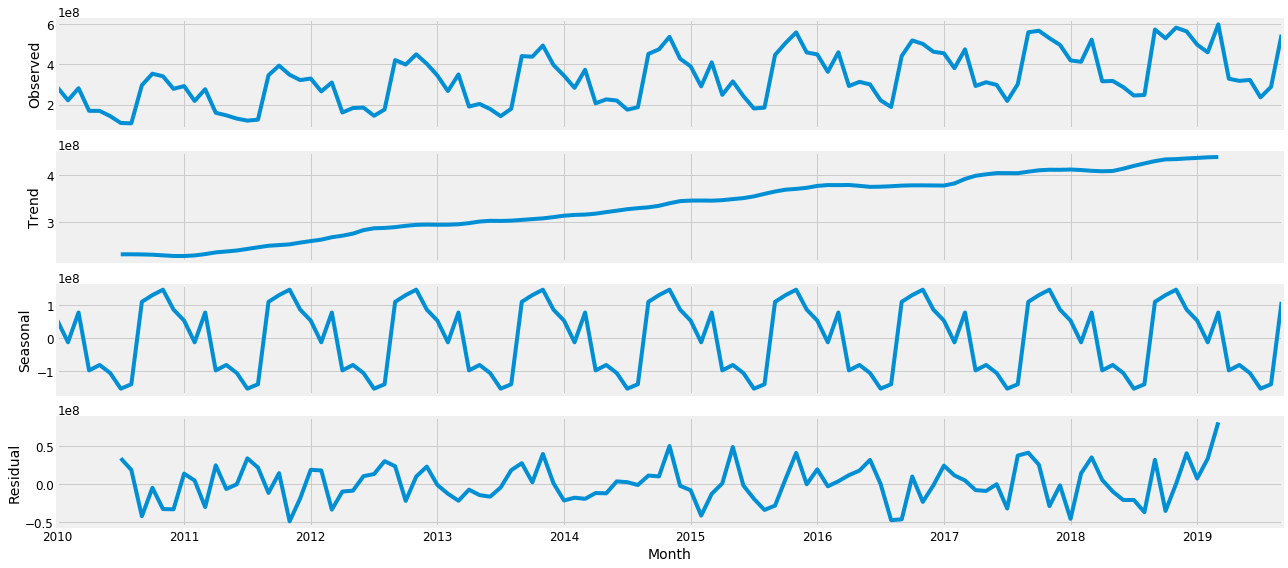

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
import warnings
warnings.filterwarnings ('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4899.5232745006315
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4339.241096212345
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3935.845504108169
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3487.875033182992
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3932.143716404153
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3897.463920160276
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:3521.6910164719484
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3460.685589000745
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4789.335376488441
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4264.980597686111
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3874.8716042653814
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:3430.918108186194
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4331.237786464398
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4250.831465445258
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:3505.5051511604115
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3420.2287655991763
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4573.524772178226
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4046.591452605764
ARIMA

In [27]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0762      0.353     -0.216      0.829      -0.769       0.616
ma.L1         -0.1662      0.342     -0.486      0.627      -0.837       0.504
ar.S.L12      -0.4954      0.474     -1.046      0.296      -1.424       0.433
ma.S.L12       0.4172      0.509      0.819      0.413      -0.581       1.415
sigma2      1.096e+15   7.85e-16    1.4e+30      0.000     1.1e+15     1.1e+15


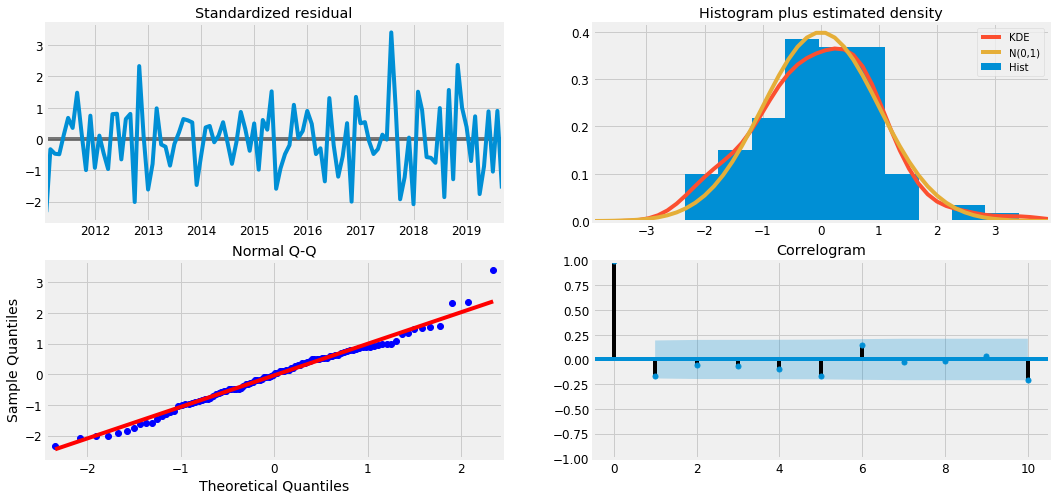

In [28]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

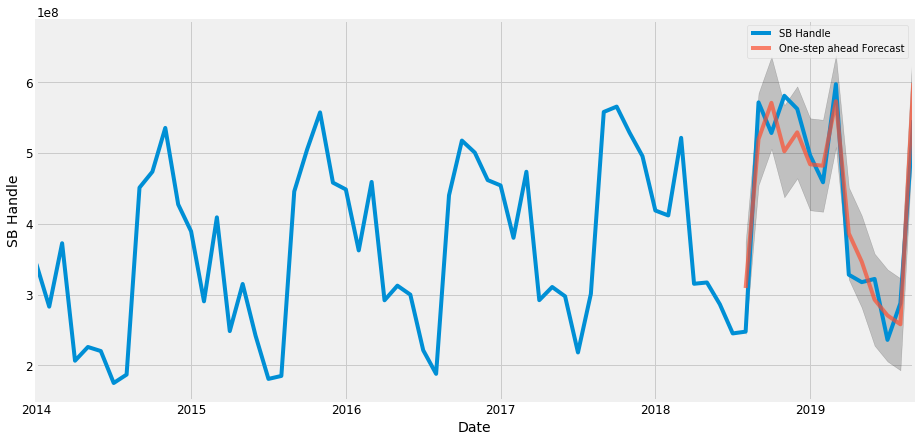

In [54]:
pred = results.get_prediction(start=pd.to_datetime('2018-08-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SB Handle')
plt.legend()
plt.show()

In [55]:
df_forecasted = pred.predicted_mean
df_truth = df['2014-01-01':'2019-09-01']
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-08-01 00:00:00   NaN
2019-09-01 00:00:00   NaN
SB Handle             NaN
dtype: float64
The Root Mean Squared Error is 2018-08-01 00:00:00   NaN
2018-09-01 00:00:00   NaN
2018-10-01 00:00:00   NaN
2018-11-01 00:00:00   NaN
2018-12-01 00:00:00   NaN
2019-01-01 00:00:00   NaN
2019-02-01 00:00:00   NaN
2019-03-01 00:00:00   NaN
2019-04-01 00:00:00   NaN
2019-05-01 00:00:00   NaN
2019-06-01 00:00:00   NaN
2019-07-01 00:00:00   NaN
2019-08-01 00:00:00   NaN
2019-09-01 00:00:00   NaN
SB Handle             NaN
dtype: float64


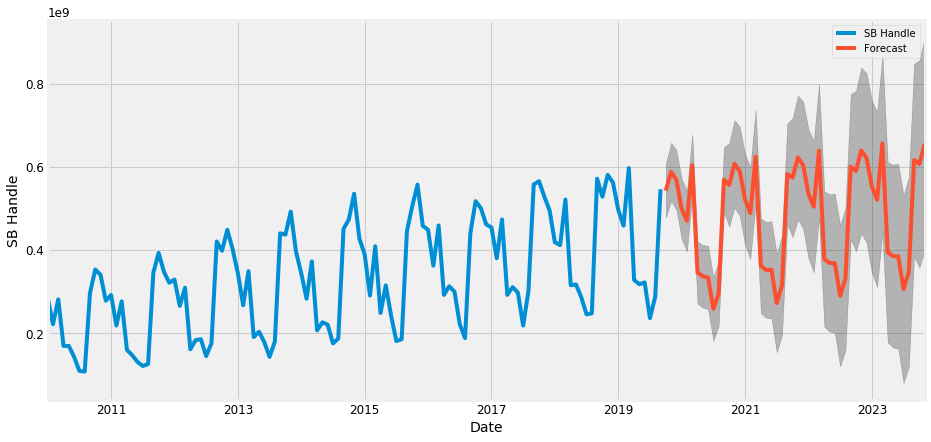

In [23]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SB Handle')
plt.legend()
plt.show()

In [13]:
df_forecasted = pred.predicted_mean
df_forecasted.head(12)

2018-09-01    5.352582e+08
2018-10-01    5.805891e+08
2018-11-01    5.196324e+08
2018-12-01    5.209387e+08
2019-01-01    4.656487e+08
2019-02-01    4.490829e+08
2019-03-01    5.513285e+08
2019-04-01    3.638745e+08
2019-05-01    3.459745e+08
2019-06-01    3.096537e+08
2019-07-01    2.722805e+08
2019-08-01    2.813603e+08
Freq: MS, dtype: float64

In [14]:
pred_ci.head(24)

,lower SB Handle,upper SB Handle
2019-10-01,4.778149e+08,6.076077e+08
2019-11-01,5.177859e+08,6.577473e+08
2019-12-01,4.972347e+08,6.403375e+08
2020-01-01,4.261611e+08,5.711402e+08
2020-02-01,3.966680e+08,5.432084e+08
2020-03-01,5.297293e+08,6.777354e+08
2020-04-01,2.710583e+08,4.204932e+08
2020-05-01,2.612396e+08,4.120833e+08
2020-06-01,2.576825e+08,4.099201e+08
2020-07-01,1.813871e+08,3.350054e+08


In [20]:
forecast = pred_uc.predicted_mean
forecast

2019-10-01    5.427113e+08
2019-11-01    5.877666e+08
2019-12-01    5.687861e+08
2020-01-01    4.986507e+08
2020-02-01    4.699382e+08
2020-03-01    6.037323e+08
2020-04-01    3.457757e+08
2020-05-01    3.366615e+08
2020-06-01    3.338013e+08
2020-07-01    2.581962e+08
2020-08-01    2.950121e+08
2020-09-01    5.691826e+08
2020-10-01    5.564515e+08
2020-11-01    6.074014e+08
2020-12-01    5.893397e+08
2021-01-01    5.215212e+08
2021-02-01    4.886191e+08
2021-03-01    6.245633e+08
2021-04-01    3.616494e+08
2021-05-01    3.519088e+08
2021-06-01    3.523680e+08
2021-07-01    2.720604e+08
2021-08-01    3.156201e+08
2021-09-01    5.827086e+08
2021-10-01    5.741261e+08
2021-11-01    6.224319e+08
2021-12-01    6.039581e+08
2022-01-01    5.351003e+08
2022-02-01    5.040775e+08
2022-03-01    6.390572e+08
2022-04-01    3.783670e+08
2022-05-01    3.689073e+08
2022-06-01    3.678776e+08
2022-07-01    2.896794e+08
2022-08-01    3.302141e+08
2022-09-01    6.004793e+08
2022-10-01    5.900358e+08
2